[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Lecture_Code/10_3_Prediction_Uncertainty.ipynb)

Import a bunch of packages.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import random
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Making fake data for a simple linear regression model.

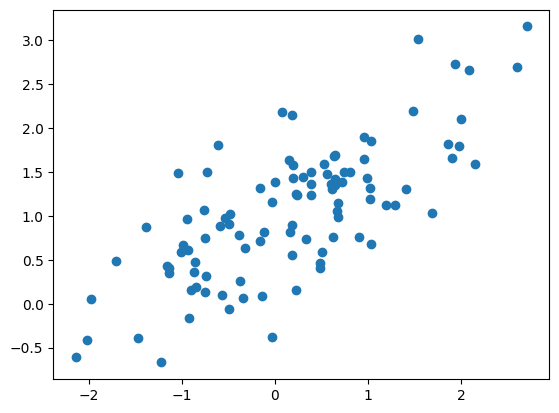

In [10]:
np.random.seed(101)
x1 = np.random.normal(0,1,100)

Beta_0 = 1
Beta_1 = .5

y = Beta_0 + Beta_1*x1+ np.random.normal(0,.5,100)

plt.scatter(x1,y)

Fit the model and view the output.

In [11]:
X = sm.add_constant(x1)
mod = sm.OLS(y,X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     117.4
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.87e-18
Time:                        10:46:10   Log-Likelihood:                -75.235
No. Observations:                 100   AIC:                             154.5
Df Residuals:                      98   BIC:                             159.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9578      0.053     18.232      0.000       0.854       1.062
x1             0.5437      0.050     10.837      0.000       0.444       0.643
==============================================================================
Omnibus:                        0.249   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.883   Jarque-Bera (JB):                0.248
Skew:                           0.113   Prob(JB):                        0.883
Kurtosis:                       2.906   Cond. No.                         1.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Predict at the point x=0.

In [12]:
# Make a new data frame to predict
# sm.add_constant won't work for a single line, so we will add the constant
# in manually. It is labelled as "const"
X_new = pd.DataFrame({"const":[1],"x":[0]})
mod.predict(X_new)

0    0.957815
dtype: float64

Get confidence intervals for the mean of the prediction and for a new individual observation.

In [13]:
# get_prediction is a new function we are using for predictions. Summary.frame prints the matrix
mod.get_prediction(X_new).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.957815,0.052534,0.853563,1.062068,-0.076737,1.992368


Plot the confidence interval for the mean.

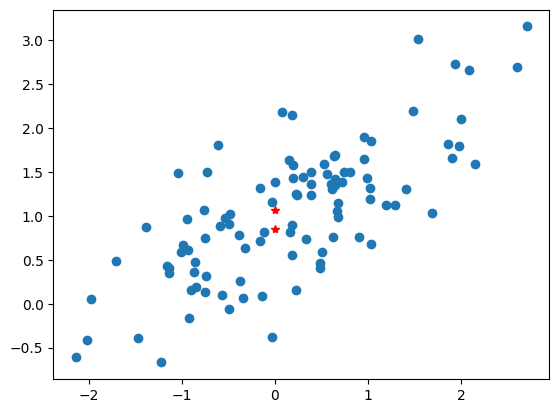

In [14]:
pred_int = mod.get_prediction(X_new).summary_frame(alpha=0.05)

plt.scatter(x1,y)
plt.plot([0,0], [pred_int.mean_ci_lower,pred_int.mean_ci_upper], marker='*', ls='none', color = "r")


Add the confidence interval for a new observation.

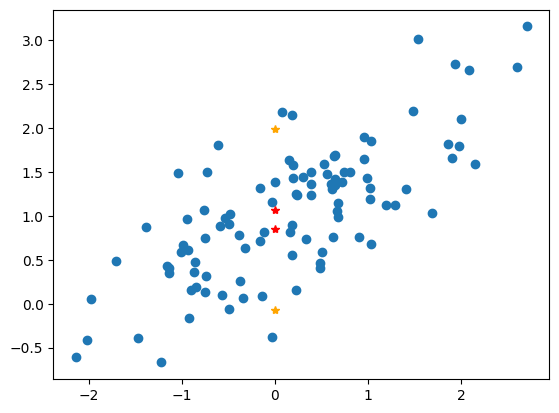

In [15]:
plt.scatter(x1,y)
plt.plot([0,0], [pred_int.mean_ci_lower,pred_int.mean_ci_upper], marker='*', ls='none', color = "r")
plt.plot([0,0], [pred_int.obs_ci_lower,pred_int.obs_ci_upper], marker='*', ls='none', color = "orange")


Generate adata frame with confidence intervals for the meana nd for prediction intervals for a range of values.

In [16]:
# Initialize an empty list to store prediction intervals
pred_int_list = []

# Create a grid of x values
x_grid = np.linspace(-2, 2, 100)

# Loop over all possible x values and get the predictions and intervals
for i in range(100):
    X_new = pd.DataFrame({"const": [1], "x": [x_grid[i]]})
    pred_int = mod.get_prediction(X_new).summary_frame(alpha=0.05)
    pred_int_list.append(pred_int)

# Combine the list of DataFrames into a single DataFrame
pred_int_mat = pd.concat(pred_int_list, ignore_index=True)

# Display the result
print(pred_int_mat)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  -0.129564  0.120429      -0.368553       0.109424     -1.186232   
1  -0.107597  0.118603      -0.342961       0.127767     -1.163451   
2  -0.085630  0.116783      -0.317383       0.146123     -1.140685   
3  -0.063663  0.114971      -0.291819       0.164493     -1.117933   
4  -0.041695  0.113165      -0.266268       0.182878     -1.095196   
..       ...       ...            ...            ...           ...   
95  1.957326  0.098626       1.761607       2.153046      0.909597   
96  1.979294  0.100355       1.780142       2.178446      0.930917   
97  2.001261  0.102096       1.798654       2.203867      0.952223   
98  2.023228  0.103847       1.817147       2.229310      0.973514   
99  2.045195  0.105608       1.835619       2.254772      0.994789   

    obs_ci_upper  
0       0.927103  
1       0.948257  
2       0.969425  
3       0.990608  
4       1.011806  
..           ...  
95      3.005056  
96     

Plot a line of the confidence intervals for a range of values.

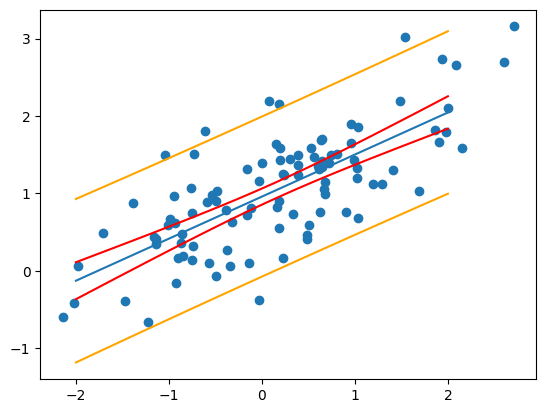

In [17]:
plt.scatter(x1,y)
plt.plot(x_grid,pred_int_mat["mean"])
plt.plot(x_grid,pred_int_mat["mean_ci_lower"],color="r")
plt.plot(x_grid,pred_int_mat["mean_ci_upper"],color = "r")
plt.plot(x_grid,pred_int_mat["obs_ci_lower"],color = "orange")
plt.plot(x_grid,pred_int_mat["obs_ci_upper"],color = "orange")


Load and view the bike data set.

In [18]:
bikes = pd.read_csv("https://richardson.byu.edu/220/bikes.csv")
bikes

,Count,Temperature,Humidity,Wind_speed,Visibility,Rainfall,Seasons,Holiday
0,449,1.7,23,1.4,2000,0.0,Winter,No Holiday
1,479,4.3,41,1.3,1666,0.0,Winter,No Holiday
2,333,5.8,85,1.7,349,0.0,Winter,No Holiday
3,393,-0.3,38,4.8,1823,0.0,Winter,No Holiday
4,321,-2.3,25,0.0,1962,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...
360,752,9.1,57,1.1,562,0.0,Autumn,No Holiday
361,672,9.3,61,1.5,390,0.0,Autumn,No Holiday
362,635,7.9,14,1.7,1688,0.0,Autumn,No Holiday
363,661,5.6,27,0.3,1522,0.0,Autumn,No Holiday


This data set is a year's worth of data and it is in order. Let's split of the last day and see if we can predict it.

In [19]:
bikes_new = pd.DataFrame(bikes.iloc[364:365])
bikes_fit = bikes.iloc[0:364]

We will scale the data. We don't absolutely need to in this case, but it is helpful to see how it is done.

In [20]:
X = pd.get_dummies(bikes_fit.drop(columns = ["Count"]),drop_first = True)
# we will make a scaling object for X and y separately, so we label this for X
scale_for_X = StandardScaler()
# Fit this scaling object to X. This stores the mean and standard deviations in
# the scaling object to be used on test data or in this case, a new observation
scale_for_X.fit(X)

# Apply the scaling to X
scaled_X = scale_for_X.transform(X)

scaled_X = pd.DataFrame(scaled_X,columns = X.columns)

y = bikes_fit.Count
# This makes the scaling object for Y
scale_for_Y = StandardScaler()
scale_for_Y.fit(y.values.reshape(-1,1))
scaled_y = pd.DataFrame(scale_for_Y.transform(y.values.reshape(-1,1)),columns = ["Count"])

Fit the model on the scaled data and view the output.

In [21]:
mod_reg = sm.OLS(scaled_y,sm.add_constant(scaled_X)).fit()
mod_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     42.28
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           5.27e-51
Time:                        10:46:10   Log-Likelihood:                -383.65
No. Observations:                 364   AIC:                             787.3
Df Residuals:                     354   BIC:                             826.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.249e-16      0.037   3.39e-15      1.000      -0.073       0.073
Temperature            0.4406      0.082      5.379      0.000       0.280       0.602
Humidity              -0.3326      0.050     -6.588      0.000      -0.432      -0.233
Wind_speed            -0.0117      0.039     -0.300      0.764      -0.088       0.065
Visibility            -0.0573      0.046     -1.238      0.216      -0.148       0.034
Rainfall              -0.1135      0.043     -2.649      0.008      -0.198      -0.029
Seasons_Spring        -0.0027      0.048     -0.056      0.955      -0.096       0.091
Seasons_Summer        -0.0994      0.059     -1.697      0.091      -0.215       0.016
Seasons_Winter        -0.3597      0.071     -5.096      0.000      -0.499      -0.221
Holiday_No Holiday    -0.0047      0.038     -0.124      0.901      -0.079       0.069
==============================================================================
Omnibus:                       29.150   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.774
Skew:                          -0.513   Prob(JB):                     2.56e-11
Kurtosis:                       4.470   Cond. No.                         4.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Refit after removing insignificant predictors.

In [22]:
mod_reg = sm.OLS(scaled_y,sm.add_constant(scaled_X.drop(columns = ["Wind_speed","Holiday_No Holiday"]))).fit()
mod_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     54.63
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.01e-52
Time:                        10:46:10   Log-Likelihood:                -383.70
No. Observations:                 364   AIC:                             783.4
Df Residuals:                     356   BIC:                             814.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.249e-16      0.037   3.39e-15      1.000      -0.072       0.072
Temperature        0.4444      0.081      5.503      0.000       0.286       0.603
Humidity          -0.3331      0.050     -6.628      0.000      -0.432      -0.234
Visibility        -0.0596      0.045     -1.314      0.190      -0.149       0.030
Rainfall          -0.1122      0.042     -2.652      0.008      -0.195      -0.029
Seasons_Spring    -0.0059      0.046     -0.128      0.898      -0.097       0.085
Seasons_Summer    -0.1023      0.058     -1.773      0.077      -0.216       0.011
Seasons_Winter    -0.3591      0.070     -5.130      0.000      -0.497      -0.221
==============================================================================
Omnibus:                       29.023   Durbin-Watson:                   1.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.364
Skew:                          -0.506   Prob(JB):                     1.91e-11
Kurtosis:                       4.494   Cond. No.                         4.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We need to make the new data look like the old data

In [23]:
bikes_new

,Count,Temperature,Humidity,Wind_speed,Visibility,Rainfall,Seasons,Holiday
364,720,6.6,35,1.3,1409,0.0,Autumn,No Holiday


In [24]:
X_new = pd.get_dummies(bikes_new.drop(columns = ["Count"]))
X_new = X_new.reindex(columns = X.columns, fill_value=0)

X_new

,Temperature,Humidity,Wind_speed,Visibility,Rainfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday
364,6.6,35,1.3,1409,0.0,0,0,0,True


In [25]:
# Drop the target variable from the new observation and get dummies
X_new = pd.get_dummies(bikes_new.drop(columns = ["Count"]))

# The previous step only had one season value (Autumn) so printing it off won't have
# Winter, Summer, or Spring values. We reindex the
# columns according to the full X matrix that has all the factor levels.
X_new = X_new.reindex(columns = X.columns, fill_value=0)

# Apply the scaling object we created earlier to the new data
scaled_X_new = pd.DataFrame(scale_for_X.transform(X_new),columns = X.columns)

scaled_X_new

,Temperature,Humidity,Wind_speed,Visibility,Rainfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday
0,-0.74808,-0.661334,-0.801256,-0.121001,-0.193899,-0.58158,-0.58158,-0.573121,0.228086


In [26]:
# Again, adding a constant with sm.add_constant doesn't work so well with a single observation
# so we add it manually
scaled_X_new["const"] = 1.0

# We also have to drop the variableswe dropped in the model
# we are wanting to use to predict. Note that the scaling object needs all the variables
# to be present, so the order here (scaling first then dropping variable) is important
mod_reg.get_prediction(scaled_X_new.drop(columns = ["Wind_speed","Holiday_No Holiday"])).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-0.473806,0.058573,-0.588999,-0.358612,-1.859368,0.911757


This is on the standardized scale. We can use the original variable's mean and sd to scale back.

In [27]:
mod_reg.get_prediction(scaled_X_new.drop(columns = ["Wind_speed","Holiday_No Holiday"])).summary_frame(alpha=0.05)*np.std(bikes_fit.Count) + np.mean(bikes_fit.Count)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,495.298803,724.614385,445.680677,544.916928,-101.515036,1092.112641


Or use this. Unfortunately it does get rid of the labeling.

In [28]:
scale_for_Y.inverse_transform(mod_reg.get_prediction(scaled_X_new.drop(columns = ["Wind_speed","Holiday_No Holiday"])).summary_frame(alpha=0.05))

array([[ 495.29880282,  724.61438455,  445.68067741,  544.91692823,
        -101.51503579, 1092.11264143]])

The prediction is bad, we don't like seeing this less than 0.

(array([46., 70., 23., 48., 36., 55., 57., 21.,  6.,  3.]),
 array([   0. ,  179.8,  359.6,  539.4,  719.2,  899. , 1078.8, 1258.6,
        1438.4, 1618.2, 1798. ]),
 <BarContainer object of 10 artists>)

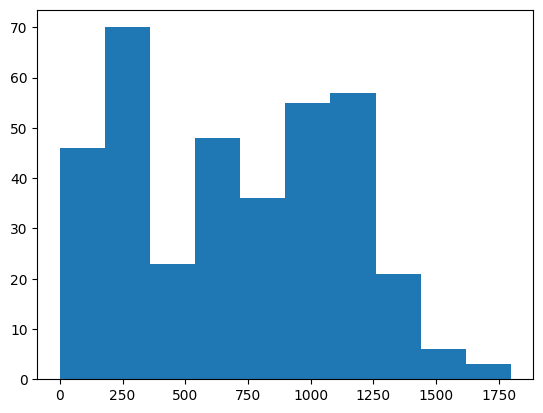

In [29]:
plt.hist(bikes.Count)

In [30]:

# Log-transform the target variable
bikes_fit['log_Count'] = np.log(bikes_fit['Count'] + 1)
scaled_y = bikes_fit['log_Count']

# Scale the target variable (log-transformed)
scale_for_Y = StandardScaler()
scale_for_Y.fit(scaled_y.values.reshape(-1, 1))
scaled_y = pd.DataFrame(scale_for_Y.transform(scaled_y.values.reshape(-1, 1)), columns=['log_Count'])

# Fit the model on the scaled data (using log-transformed target)
mod_reg = sm.OLS(scaled_y, sm.add_constant(scaled_X.drop(columns=["Wind_speed", "Holiday_No Holiday"]))).fit()


# Prepare the new data for prediction (log-transform and scale)
X_new = pd.get_dummies(bikes_new.drop(columns=["Count"]))
X_new = X_new.reindex(columns=X.columns, fill_value=0)

scaled_X_new = pd.DataFrame(scale_for_X.transform(X_new), columns=X.columns)
scaled_X_new["const"] = 1.0

# Get predictions and confidence intervals on the standardized log scale
pred_df = mod_reg.get_prediction(scaled_X_new.drop(columns=["Wind_speed", "Holiday_No Holiday"])).summary_frame(alpha=0.05)

# Transform back to the original scale
pred_df_orig_scale = scale_for_Y.inverse_transform(pred_df)
pred_df_orig_scale = np.exp(pred_df_orig_scale)[0] - 1

# Extract prediction and confidence intervals
predicted_count = pred_df_orig_scale[0]
lower_bound = pred_df_orig_scale[2]
upper_bound = pred_df_orig_scale[3]
lower_bound_obs = pred_df_orig_scale[4]
upper_bound_obs = pred_df_orig_scale[5]

print(f"Predicted Count: {predicted_count}")
print(f"95% Mean Confidence Interval: ({lower_bound}, {upper_bound})")
print(f"95% Observation Confidence Interval: ({lower_bound_obs}, {upper_bound_obs})")

Predicted Count: 340.59784950453934
95% Mean Confidence Interval: (275.34825344921694, 421.25376614355605)
95% Observation Confidence Interval: (25.68232137982558, 4372.273566607822)


/var/folders/ln/7fhs1xfd0sqdy8gcndnsvsg40000gn/T/ipykernel_88534/2340156426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_fit['log_Count'] = np.log(bikes_fit['Count'] + 1)
